In [2]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

In [3]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .05
mpl.rcParams['figure.subplot.top']    = .9
mpl.rcParams['figure.subplot.left']   = .05
mpl.rcParams['figure.subplot.right']  = .85
mpl.rcParams['figure.subplot.wspace'] = .02
mpl.rcParams['figure.subplot.hspace'] = .0
mpl.rcParams['figure.figsize']        = 7,2.5


cols = {}
cols['ocean'] = '.7'
cols['land'] = '.9'

In [4]:
def makeglobal(ax):
    ax.set_global()
    ax.add_feature(cfeature.LAND,color=cols['land'])
    ax.add_feature(cfeature.OCEAN,color=cols['ocean'])
    ax.outline_patch.set_visible(False)

In [5]:
#Pure process uncertainties
#Get 1x1 degree grid
with xr.open_dataset('../rawdata/rsl_85_2090.nc') as ds:
#    lon = ds['x'].values
#    lat = ds['y'].values
    slr_md = ds['slr_md'].values

def proc(scen):
    with xr.open_dataset(f'../rawdata/component-ts-slr-{scen[-2:]}.nc') as ds:
        gdyn_h = 100.*np.nanmean(ds['greendyn_h'].values[-20:,:,:],axis=0)
        gdyn_l = 100.*np.nanmean(ds['greendyn_l'].values[-20:,:,:],axis=0)
        lws_h  = 100.*np.nanmean(ds['grw_h'].values[-20:,:,:],axis=0)
        lws_l  = 100.*np.nanmean(ds['grw_l'].values[-20:,:,:],axis=0)
        gia = 100.*np.nanmean(ds['gia_sd'].values[-20:,:,:],axis=0)

    gdyn = (np.abs(gdyn_h-gdyn_l)/(2*1.645))**2.
    lws = (np.abs(lws_h-lws_l)/(2*1.645))**2.
    gia = gia**2.
    gdyn[np.isnan(slr_md)] = np.nan
    lws[np.isnan(slr_md)] = np.nan
    gia[np.isnan(slr_md)] = np.nan
    return gdyn,lws,gia

/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Degrees of freedom <= 0 for slice.
  
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Degrees of freedom <= 0 for slice.
  if __name__ == '__main__':
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Degrees of freedom <= 0 for slice.
  # Remove the CWD from sys.path while we load stuff.
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Degrees of freedom <= 0 for slice.
  # This is added back by InteractiveShellApp.init_path()
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Degrees of freedom <= 0 for slice.
  if sys.path[0] == '':
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remov

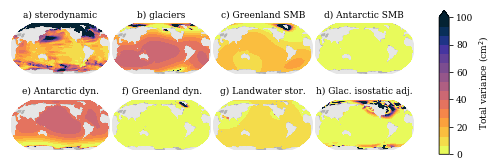

/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Degrees of freedom <= 0 for slice.
  
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Degrees of freedom <= 0 for slice.
  if __name__ == '__main__':
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Degrees of freedom <= 0 for slice.
  # Remove the CWD from sys.path while we load stuff.
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Degrees of freedom <= 0 for slice.
  # This is added back by InteractiveShellApp.init_path()
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Degrees of freedom <= 0 for slice.
  if sys.path[0] == '':
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remov

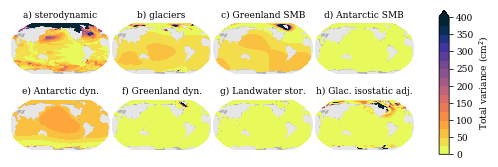

In [6]:
vmaxx = [100,400]
ncols = [15,16]

for s,scen in enumerate(['rcp45','rcp85']):
    with xr.open_dataset(f'../data/ensemble_reg_{scen}.nc') as ds:
        lon = ds['lon'].values
        lat = ds['lat'].values
        stdn = np.nanvar(ds['stdn'].values,axis=(0,1))
        glac = np.nanvar(ds['glac'].values,axis=(0,1))*2.
        gsmb = np.nanvar(ds['gsmb'].values,axis=(0,1))
        asmb = np.nanvar(ds['asmb'].values,axis=(0,1))
        adyn = np.nanvar(ds['adyn'].values,axis=(0,1))
        
    gdyn,lws,gia = proc(scen)
    
    vmax = vmaxx[s]
    cmap = plt.get_cmap('cmo.thermal_r',ncols[s])
    
    fig = plt.figure()
    
    ax = fig.add_subplot(2,4,1,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,stdn,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('a) sterodynamic')
    makeglobal(ax)
    
    ax = fig.add_subplot(2,4,2,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,glac,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('b) glaciers')
    makeglobal(ax)    
    
    ax = fig.add_subplot(2,4,3,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,gsmb,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('c) Greenland SMB')
    makeglobal(ax)
    
    ax = fig.add_subplot(2,4,4,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,asmb,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('d) Antarctic SMB')
    makeglobal(ax)

    ax = fig.add_subplot(2,4,5,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,adyn,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('e) Antarctic dyn.')
    makeglobal(ax)

    ax = fig.add_subplot(2,4,6,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,gdyn,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('f) Greenland dyn.')
    makeglobal(ax)
    
    ax = fig.add_subplot(2,4,7,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,lws,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('g) Landwater stor.')
    makeglobal(ax)    
    
    ax = fig.add_subplot(2,4,8,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,gia,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('h) Glac. isostatic adj.')
    makeglobal(ax)
    
    cax = fig.add_axes([.9,.1,.02,.8])
    cb = plt.colorbar(im,cax=cax,extend='max')
    cb.set_label('Total variance (cm$^2$)')
    
    figname = f'draftplot_totvar_components_{scen}.png'

    plt.savefig(f'../figures/{figname}',dpi=600)
    plt.savefig(f'../../../writing/codependence/figures/{figname}',dpi=600)
    plt.show()
    plt.close()